#A look at the 2023 American League West

With a little more than one month remaining in the 2023 regular season, the American League West division has emerged as the most competitive divisional race in baseball. As of August 28th, the Seattle Mariners, Texas Rangers, and Houston Astros all stand at least 16 games over .500 and within one game of first place.



In [5]:
import pybaseball as pb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

__Current standings:__

In [3]:
print(pb.standings()[2])

                   Tm   W   L  W-L%    GB  E#
1    Seattle Mariners  74  56  .569    --  --
2       Texas Rangers  73  57  .562   1.0  32
3      Houston Astros  74  58  .561   1.0  31
4  Los Angeles Angels  63  68  .481  11.5  21
5   Oakland Athletics  38  93  .290  36.5   ☠


In this article I will dive into some of the division's key statistics, trends, and storylines, with supporting visualizations and data where I find it helpful.

***
##The divisional race


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
year = 2023
sea = pyball.schedule_and_record(year, 'SEA')
tex = pyball.schedule_and_record(year, 'TEX')
hou = pyball.schedule_and_record(year, 'HOU')
laa = pyball.schedule_and_record(year, 'LAA')
oak = pyball.schedule_and_record(year, 'OAK')

http://www.baseball-reference.com/teams/SEA/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/TEX/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/HOU/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/LAA/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/2023-schedule-scores.shtml


In [46]:
print(sea['Wins'][161] + sea['Losses'][161])

130


In [54]:
def daily_stats(team):
    team['Wins'] = np.where(team['W/L']=='W', 1, (np.where(team['W/L']=='W-wo', 1, 0))).cumsum()
    team['Losses'] = np.where(team['W/L']=='L', 1, (np.where(team['W/L']=='L-wo', 1, 0))).cumsum()
    team['Win_Percentage'] = team['Wins'] / (team['Wins'] + team['Losses'])
    # team['Wins'] = team['Wins'][~np.isnan(team['Wins'])]
    return team.truncate(before=0, after=team['Wins'][len(team)-1]+team['Losses'][len(team)-1], axis='index')

sea = daily_stats(sea)
tex = daily_stats(tex)
hou = daily_stats(hou)
laa = daily_stats(laa)
oak = daily_stats(oak)

In [55]:
print(sea)
print(hou)
print(tex)

                  Date   Tm Home_Away  Opp   W/L     R   RA   Inn    W-L  \
1     Thursday, Mar 30  SEA      Home  CLE     W   3.0  0.0   9.0    1-0   
2       Friday, Mar 31  SEA      Home  CLE     L   4.0  9.0   9.0    1-1   
3      Saturday, Apr 1  SEA      Home  CLE     L   0.0  2.0   9.0    1-2   
4        Sunday, Apr 2  SEA      Home  CLE     L   5.0  6.0  10.0    1-3   
5        Monday, Apr 3  SEA      Home  LAA     L   3.0  7.0   9.0    1-4   
..                 ...  ...       ...  ...   ...   ...  ...   ...    ...   
125     Monday, Aug 21  SEA         @  CHW     W  14.0  2.0   9.0  70-55   
126    Tuesday, Aug 22  SEA         @  CHW     W   6.0  3.0   9.0  71-55   
127  Wednesday, Aug 23  SEA         @  CHW  L-wo   4.0  5.0  10.0  71-56   
128     Friday, Aug 25  SEA      Home  KCR     W   7.0  5.0   9.0  72-56   
129   Saturday, Aug 26  SEA      Home  KCR     W  15.0  2.0   9.0  73-56   

     Rank  ...     Save  Time D/N Attendance   cLI Streak  Orig. Scheduled  \
1     1.0

Text(0.5, 1.0, 'AL West Divisional Race (2023)')

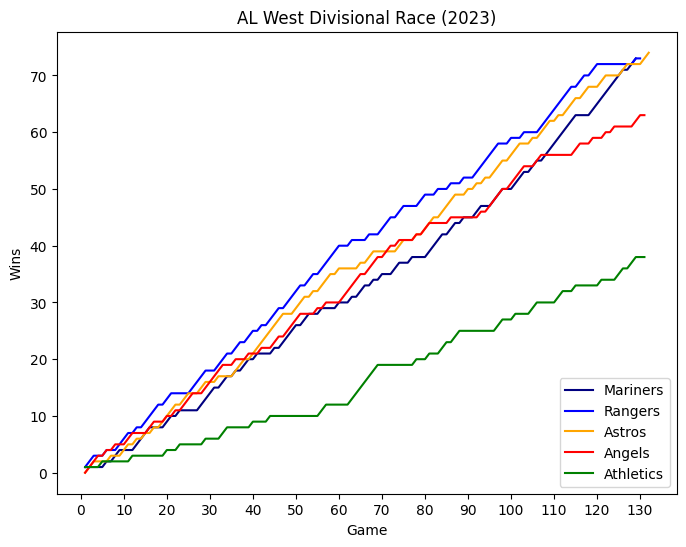

In [56]:
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(sea['Wins'], label='Mariners', c='navy')
plt.plot(tex['Wins'], label='Rangers', c='blue')
plt.plot(hou['Wins'], label='Astros', c='orange')
plt.plot(laa['Wins'], label='Angels', c='red')
plt.plot(oak['Wins'], label='Athletics', c='green')

plt.xticks(np.arange(0, 140, step=10))
plt.xlabel('Game')
plt.ylabel('Wins')

plt.legend(loc='lower right')

plt.title("AL West Divisional Race ({})".format(year))